In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

In [3]:
naive = pd.read_csv("naive_free.csv", header=None, names=["instance", "lb", "conflicts", "lbd", "lcl", "time"])
#naive = naive.drop(naive[naive["instance"] == "la31"].index)
# print the average of each column
averagelbd_naive = naive["lbd"].mean()
averagelcl_naive = naive["lcl"].mean() 

print(averagelbd_naive)
print(averagelcl_naive)


21.310703125940307
38.67489479903088


In [4]:
prev = pd.read_csv("prev_free.csv", header=None, names=["instance", "lb", "conflicts", "lbd", "lcl", "time"])
#prev = prev.drop(prev[prev["instance"] == "la31"].index)

averagelbd_prev = prev["lbd"].mean()
averagelcl_prev = prev["lcl"].mean()    

print(averagelbd_prev)
print(averagelcl_prev)

19.088806532473885
31.732302943635965


In [5]:
lc = pd.read_csv("lc_free2.csv", header=None, names=["instance", "lb", "conflicts", "lbd", "lcl", "time"])
#drop specific row 
#lc = lc.drop(lc[lc["instance"] == "la31"].index)
averagelbd_lc = lc["lbd"].mean()
averagelcl_lc = lc["lcl"].mean()

print(averagelbd_lc)
print(averagelcl_lc)

8.62000572524654
14.794958626257062


In [6]:
from scipy.stats import wilcoxon
# use student t-test to compare the three approaches
from scipy.stats import ttest_ind


#compare for conflicts how much on average the three approahces differ from the minimum per row where the minimum per row is scaled to 1 and 0 values are dropped
def compare_conflicts(df1, df2, df3):
    
    stat, p = ttest_ind(df3["conflicts"], df1["conflicts"], alternative='less')
    print(f"Wilcoxon test between Last Cluster and Naive: statistic={stat}, p-value={p}")

    stat, p = ttest_ind(df2["conflicts"], df1["conflicts"], alternative='less')
    print(f"Wilcoxon test between Previously Scheduled and Naive: statistic={stat}, p-value={p}")
    min_conflicts_per_row = df1["conflicts"] #pd.concat(df1["conflicts"], axis=1).min(axis=1)   

    #plot the distribution of conflicts for naive, last cluster and last cluster - naive in three separate histograms
   

    df1["scaled"] = df1["conflicts"] / min_conflicts_per_row
    df2["scaled"] = df2["conflicts"] / min_conflicts_per_row
    df3["scaled"] = df3["conflicts"] / min_conflicts_per_row

    #plot for every instance the line chart from naive previously scheduled and last cluster with lbd on the horizontal axis and scale number of conflicts on the vertical axis
    #plt.figure(figsize=(10, 6))
    #every line should only have three points, every instance has its own line 
    #concatenate the three dataframes on the instance column
    #df_combined = pd.concat([df1.set_index("instance"), df2.set_index("instance"), df3.set_index("instance")], axis=1, keys=["Naive", "Previously Scheduled", "Last Cluster"])
    #transpose the dataframe so that the instances are on the x-axis and the methods are on the y-axis
    #df_combined = df_combined.transpose()
    #print(df_combined.head())
    # for every column in df_combined, for every method plot the scaled conflicts against the lbd
    #for i in df_combined.columns:
    #    df_combined[i]["scaled"].plot(label=method, marker='o')
    
    # Drop rows where scaled is 0
    df1 = df1[df1["scaled"] > 0]
    df2 = df2[df2["scaled"] > 0]
    df3 = df3[df3["scaled"] > 0]
    
    
    avg_diff_df1 = (df1["scaled"]).mean()
    avg_diff_df2 = (df2["scaled"]).mean()
    avg_diff_df3 = (df3["scaled"]).mean()
    
    return avg_diff_df1, avg_diff_df2, avg_diff_df3

avg_diff_naive, avg_diff_prev, avg_diff_lc = compare_conflicts(naive, prev, lc)
print(f"Average number of conflicts (Naive): {naive['conflicts'].mean()}")
print(f"Average number of conflicts (Previously Scheduled): {prev['conflicts'].mean()}")
print(f"Average number of conflicts (Last Cluster): {lc['conflicts'].mean()}")

print(f"Average difference in conflicts (Naive): {avg_diff_naive}")
print(f"Average difference in conflicts (Previously Scheduled): {avg_diff_prev}")   
print(f"Average difference in conflicts (Last Cluster): {avg_diff_lc}")

Wilcoxon test between Last Cluster and Naive: statistic=-4.58696905177516, p-value=6.656791197914033e-06
Wilcoxon test between Previously Scheduled and Naive: statistic=-2.54267712012619, p-value=0.006283044598801143
Average number of conflicts (Naive): 45237.14
Average number of conflicts (Previously Scheduled): 19478.14
Average number of conflicts (Last Cluster): 1801.24
Average difference in conflicts (Naive): 1.0
Average difference in conflicts (Previously Scheduled): 0.9257471105544876
Average difference in conflicts (Last Cluster): 0.40976461787529195


In [7]:
# please do the same as above for time
def compare_time(df1, df2, df3):
    
    min_time_per_row = df1["time"]  # pd.concat(df1["time"], axis=1).min(axis=1)   

    df1["scaled"] = df1["time"] / min_time_per_row
    df2["scaled"] = df2["time"] / min_time_per_row
    df3["scaled"] = df3["time"] / min_time_per_row
    
    # Drop rows where scaled is 0
    df1 = df1[df1["scaled"] > 0]
    df2 = df2[df2["scaled"] > 0]
    df3 = df3[df3["scaled"] > 0]
    
    avg_diff_df1 = (df1["scaled"]).mean()
    avg_diff_df2 = (df2["scaled"]).mean()
    avg_diff_df3 = (df3["scaled"]).mean()
    
    return avg_diff_df1, avg_diff_df2, avg_diff_df3

avg_diff_time_naive, avg_diff_time_prev, avg_diff_time_lc = compare_time(naive, prev, lc)
print(f"Average difference in time (Naive): {avg_diff_time_naive}")
print(f"Average difference in time (Previously Scheduled): {avg_diff_time_prev}")
print(f"Average difference in time (Last Cluster): {avg_diff_time_lc}")

Average difference in time (Naive): 1.0
Average difference in time (Previously Scheduled): 0.8221182736790098
Average difference in time (Last Cluster): 0.7729463955893777


50
  instance     lb  conflicts        lbd        lcl     time  scaled
0     abz5  1234*     219817  15.667986  34.105497  1019.19     1.0
1     abz6    943      36383  13.759938  33.126519   521.84     1.0
2     abz7  1924*        549  29.107468  34.965392   806.04     1.0
3     ft06     55         17   3.785714   6.750000     1.34     1.0
4     ft10   966*      11783  21.531613  42.864890   447.70     1.0


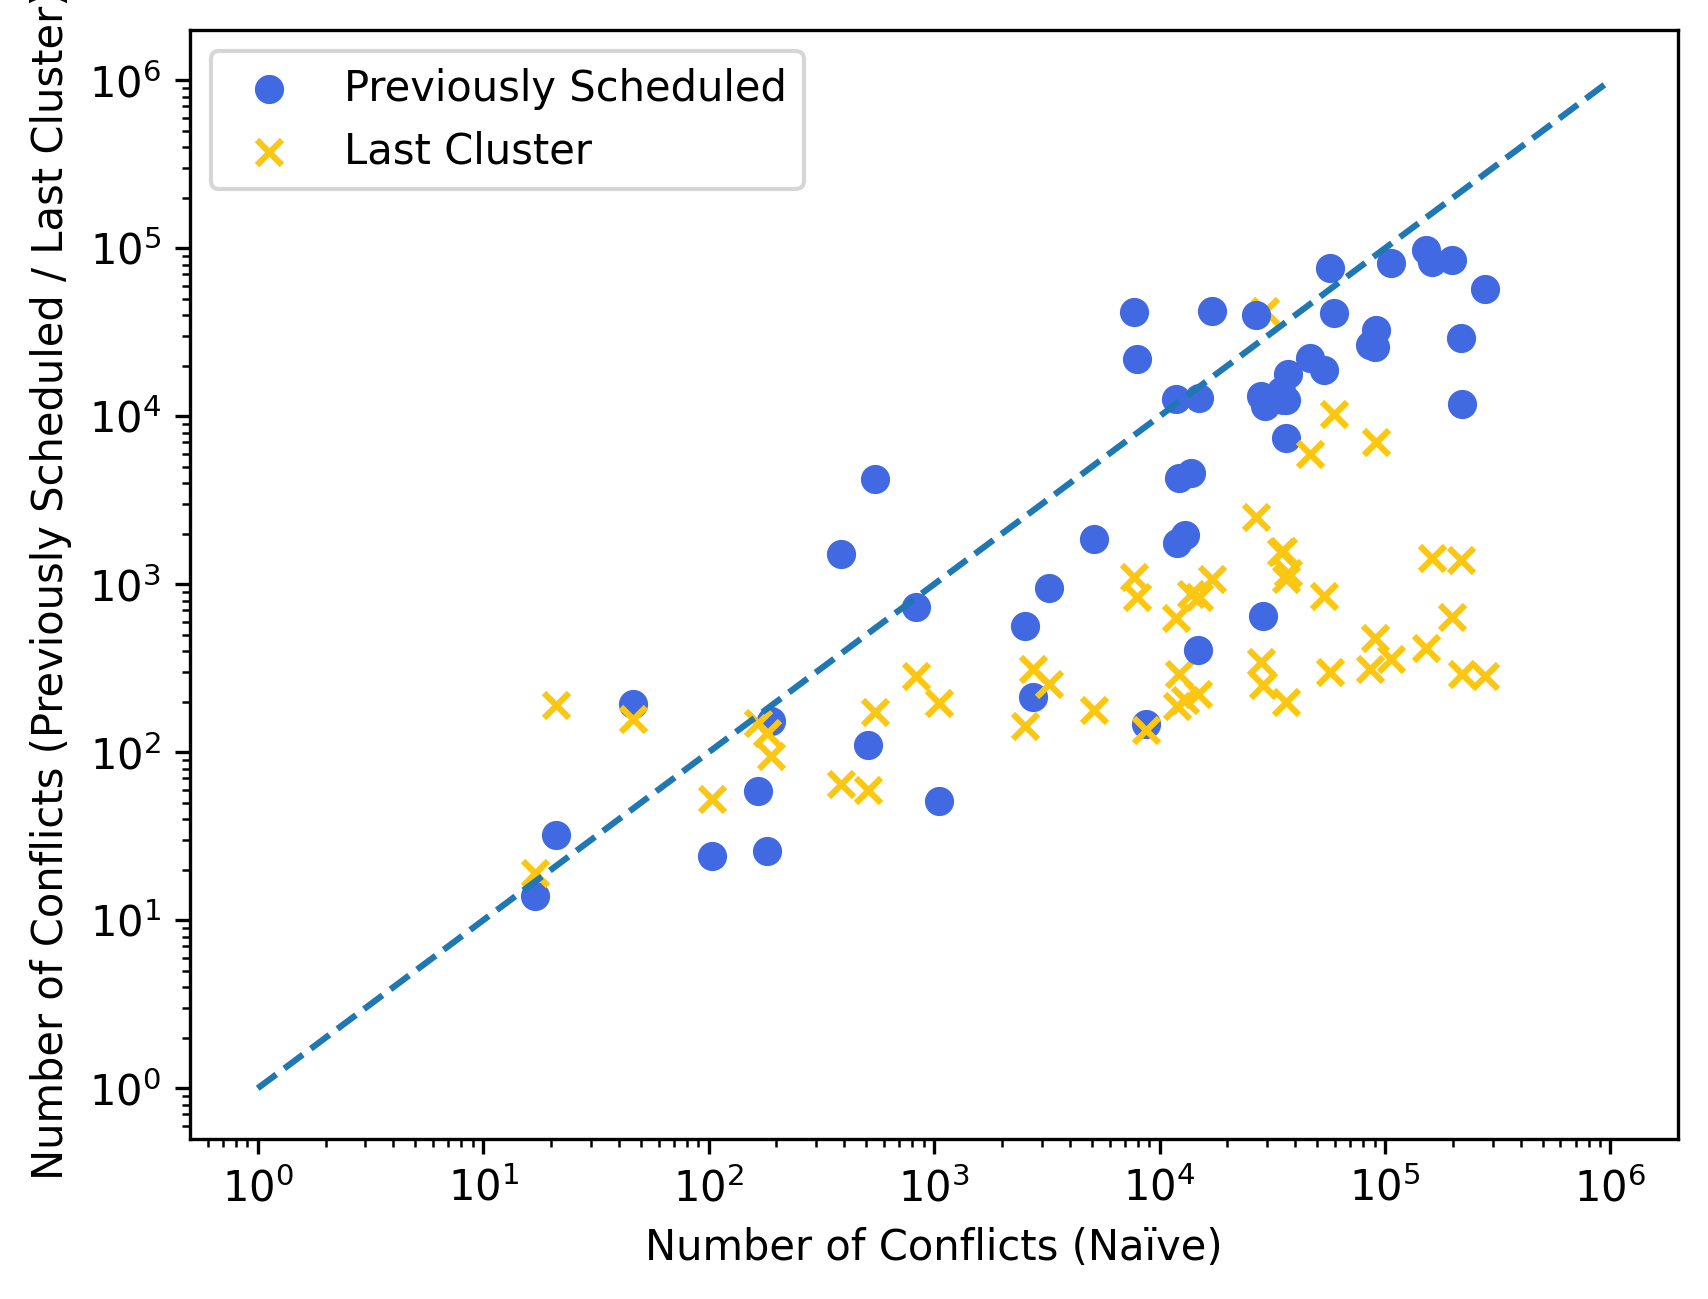

In [ ]:
plt.figure(dpi=300)
print(len(naive["instance"].unique()))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Naïve baseline number of conflicts")
ax.set_ylabel("Non-baseline number of conflicts")
print(naive.head())
for i in naive["instance"].unique():
    naive_conf = naive[naive["instance"] == i]["conflicts"]
    prev_conf = prev[prev["instance"] == i]["conflicts"]
    lc_conf = lc[lc["instance"] == i]["conflicts"]
    plt.scatter(naive_conf, prev_conf, label="Previously Scheduled", color='#4169e1')
    plt.scatter(naive_conf, lc_conf, label="Last Cluster", color='#fcc712', marker='x')
xmin = 0
xmax = naive["conflicts"].max()
ymin = 0
ymax = max(prev["conflicts"].max(), lc["conflicts"].max())
xmargin = 0.1 * (xmax - xmin)
ymargin = 0.1 * (ymax - ymax)
margin = 0.5 * (xmargin + ymargin)
cmin = max(ymin, xmin)
cmax = min(xmax, ymax)
#plt.plot(*[[cmin - margin, cmax + margin]] * 2)
x = np.logspace(0, 6, 1000)
plt.plot(x, x, linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


50
  instance     lb  conflicts        lbd        lcl     time  scaled
0     abz5  1234*     219817  15.667986  34.105497  1019.19     1.0
1     abz6    943      36383  13.759938  33.126519   521.84     1.0
2     abz7  1924*        549  29.107468  34.965392   806.04     1.0
3     ft06     55         17   3.785714   6.750000     1.34     1.0
4     ft10   966*      11783  21.531613  42.864890   447.70     1.0


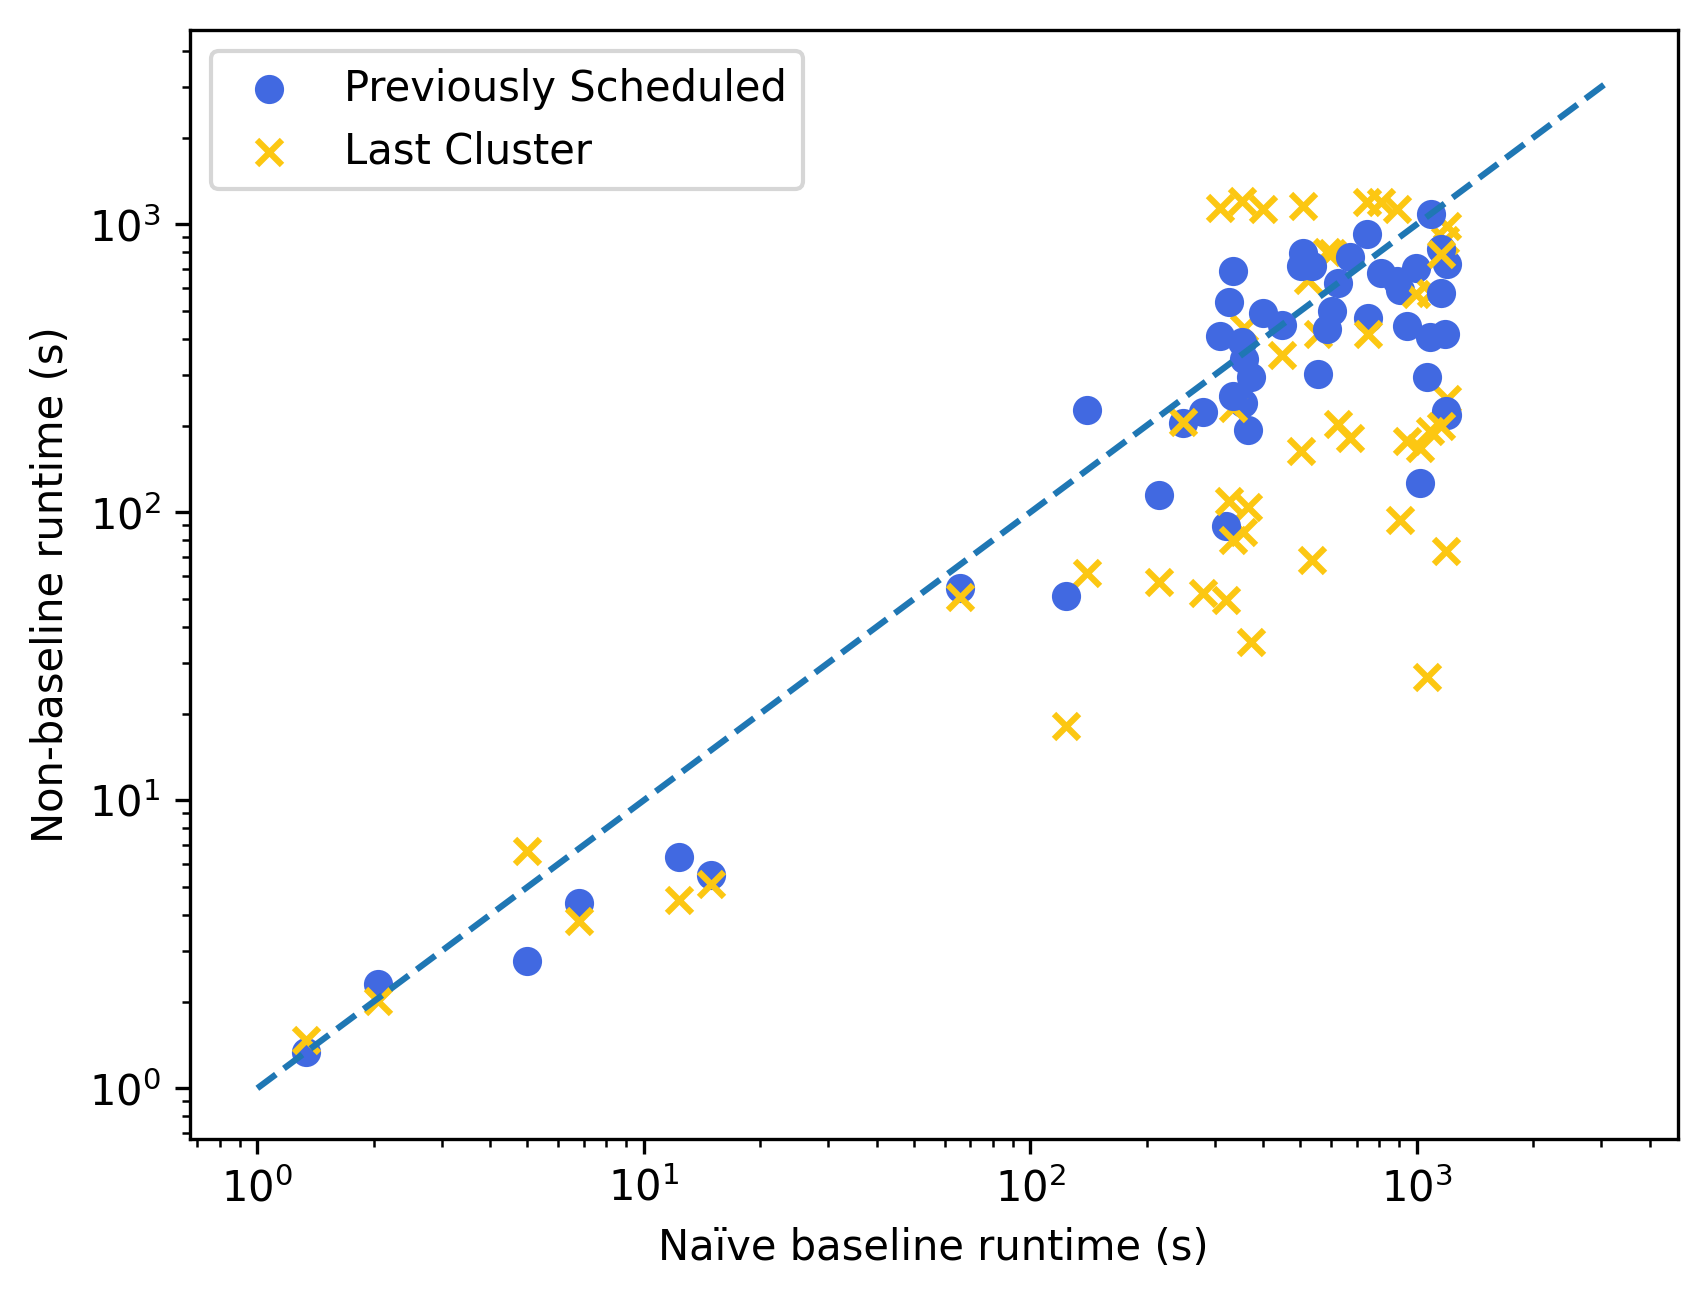

In [23]:
plt.figure(dpi=300)
print(len(naive["instance"].unique()))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Naïve baseline runtime (s)")
ax.set_ylabel("Non-baseline runtime (s)")
print(naive.head())
for i in naive["instance"].unique():
    naive_conf = naive[naive["instance"] == i]["time"]
    prev_conf = prev[prev["instance"] == i]["time"]
    lc_conf = lc[lc["instance"] == i]["time"]
    plt.scatter(naive_conf, prev_conf, label="Previously Scheduled", color='#4169e1')
    plt.scatter(naive_conf, lc_conf, label="Last Cluster", color='#fcc712', marker='x')
xmin = 0
xmax = naive["time"].max()
ymin = 0
ymax = max(prev["time"].max(), lc["time"].max())
xmargin = 0.1 * (xmax - xmin)
ymargin = 0.1 * (ymax - ymax)
margin = 0.5 * (xmargin + ymargin)
cmin = max(ymin, xmin)
x = np.logspace(0, 3.5, 1000)
plt.plot(x, x, linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

In [18]:
print(lc.nlargest(7, 'time')[["instance", "time"]])

   instance     time
34     la30  1201.18
38     la34  1197.87
2      abz7  1197.59
33     la29  1156.77
39     la35  1137.20
36     la32  1134.16
31     la27  1131.15
